In [53]:
# data processing
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid');

### EDA  Rent Data 

In [3]:

df_rent  = pd.read_excel(r'Sample Apartment and concessions Data.xlsx', \
                           index_col=0,sheet_name= 'Rent Observations')
df_rent.head()

#df_delivery  = pd.read_excel(r'Sample Apartment and concessions Data.xlsx', \
 #                          index_col=0,sheet_name= 'Delivery Dates')




,ApartmentModelID,ApartmentDataSourceID,ObservationDateDaily,ObservationDate,ApartmentRentID,ApartmentUnitID,MinRent,RentBasisID,UpdatedDate,PropertyApartmentID,AvailableOnDate,NumUnitsAvailable,MonthlyDiscount,NumFreeMonths,TotalConcessionValue
PropertyID,,,,,,,,,,,,,,,
7761149,1141594,4,2018-02-21,2018-02-21 14:21:39.087,1535470284,NaN,699,1,2018-02-21 14:21:39.450,5165020,NaN,NaN,NaN,NaN,NaN
7761149,1141595,4,2018-02-21,2018-02-21 14:21:45.250,1535470824,NaN,769,1,2018-02-21 14:21:45.310,5165020,NaN,NaN,NaN,NaN,NaN
7761149,1141598,4,2018-02-21,2018-02-21 14:21:45.343,1535470839,NaN,899,1,2018-02-21 14:21:45.387,5165020,NaN,NaN,NaN,NaN,NaN
7761149,1141599,4,2018-02-21,2018-02-21 14:21:45.460,1535470875,NaN,989,1,2018-02-21 14:21:45.590,5165020,NaN,NaN,NaN,NaN,NaN
7761149,1141601,4,2018-02-21,2018-02-21 14:21:46.497,1535470929,NaN,1125,1,2018-02-21 14:21:46.570,5165020,NaN,NaN,NaN,NaN,NaN


In [4]:
df_rent.describe().T

,count,mean,min,25%,50%,75%,max,std
ApartmentModelID,79490.0,1669208.770386,399.0,1153671.0,1700287.0,2371807.0,3178018.0,785496.127315
ApartmentDataSourceID,79490.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0
ObservationDateDaily,79490,2021-04-13 15:39:42.277016064,2018-01-02 00:00:00,2020-06-02 00:00:00,2021-04-22 00:00:00,2022-02-07 00:00:00,2023-03-08 00:00:00,NaN
ObservationDate,79490,2021-04-14 05:18:30.606597376,2018-01-02 14:38:30.280000,2020-06-02 16:12:30.831749888,2021-04-22 17:36:15.606500096,2022-02-07 12:38:51.032500224,2023-03-08 16:10:15.033000,NaN
ApartmentRentID,79490.0,6545583355.499962,1307207390.0,5456781253.25,6742156139.0,7556807013.75,8793745122.0,1306409706.969675
ApartmentUnitID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinRent,79490.0,1190.741037,0.0,889.0,1149.0,1480.0,107011.0,741.309751
RentBasisID,79490.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
UpdatedDate,79490,2021-04-14 05:18:30.627143936,2018-01-02 14:38:30.283000,2020-06-02 16:12:30.840250112,2021-04-22 17:36:15.633499904,2022-02-07 12:38:51.046500096,2023-03-08 16:10:15.063000,NaN
PropertyApartmentID,79490.0,5160979.24388,43298.0,5165432.0,5252688.0,5701578.0,7138050.0,1076976.014226


In [5]:
rent_numeric_cols = df_rent.select_dtypes(include=np.number).columns
rent_numeric_cols

Index(['ApartmentModelID', 'ApartmentDataSourceID', 'ApartmentRentID',
       'ApartmentUnitID', 'MinRent', 'RentBasisID', 'PropertyApartmentID',
       'AvailableOnDate', 'NumUnitsAvailable', 'MonthlyDiscount',
       'NumFreeMonths', 'TotalConcessionValue'],
      dtype='object')

In [6]:
df_rent_num = df_rent[rent_numeric_cols].fillna(0)
df_rent_num

,ApartmentModelID,ApartmentDataSourceID,ApartmentRentID,ApartmentUnitID,MinRent,RentBasisID,PropertyApartmentID,AvailableOnDate,NumUnitsAvailable,MonthlyDiscount,NumFreeMonths,TotalConcessionValue
PropertyID,,,,,,,,,,,,
7761149,1141594,4,1535470284,0.0,699,1,5165020,0.0,0.0,0.0,0.00,0.0
7761149,1141595,4,1535470824,0.0,769,1,5165020,0.0,0.0,0.0,0.00,0.0
7761149,1141598,4,1535470839,0.0,899,1,5165020,0.0,0.0,0.0,0.00,0.0
7761149,1141599,4,1535470875,0.0,989,1,5165020,0.0,0.0,0.0,0.00,0.0
7761149,1141601,4,1535470929,0.0,1125,1,5165020,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12797441,3031246,4,8562678941,0.0,2698,1,6477132,0.0,0.0,0.0,0.92,0.0
12797441,3031247,4,8562678947,0.0,3299,1,6477132,0.0,0.0,0.0,0.92,0.0
12797441,3031823,4,8562678895,0.0,1299,1,6477132,0.0,0.0,0.0,0.92,0.0


In [7]:
rent_corr = df_rent_num.corr()
rent_corr

,ApartmentModelID,ApartmentDataSourceID,ApartmentRentID,ApartmentUnitID,MinRent,RentBasisID,PropertyApartmentID,AvailableOnDate,NumUnitsAvailable,MonthlyDiscount,NumFreeMonths,TotalConcessionValue
ApartmentModelID,1.000000,NaN,0.128659,NaN,0.141615,NaN,0.429283,NaN,NaN,-0.004870,0.172537,-0.008108
ApartmentDataSourceID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApartmentRentID,0.128659,NaN,1.000000,NaN,0.061342,NaN,0.068278,NaN,NaN,-0.021481,-0.060435,-0.049721
ApartmentUnitID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinRent,0.141615,NaN,0.061342,NaN,1.000000,NaN,0.126431,NaN,NaN,0.007733,0.123632,0.084823
RentBasisID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PropertyApartmentID,0.429283,NaN,0.068278,NaN,0.126431,NaN,1.000000,NaN,NaN,0.004870,0.126383,0.003204
AvailableOnDate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumUnitsAvailable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyDiscount,-0.004870,NaN,-0.021481,NaN,0.007733,NaN,0.004870,NaN,NaN,1.000000,-0.015388,0.034366


<Axes: >

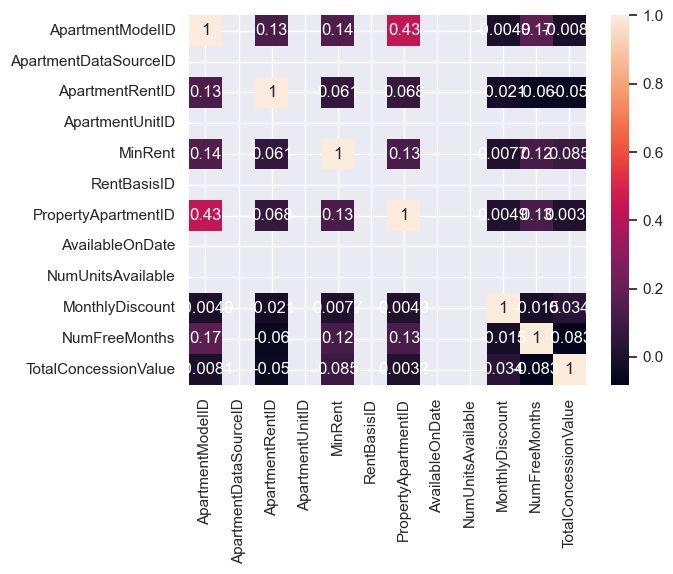

In [8]:
sns.heatmap(rent_corr, annot=True)

In [9]:
df_rent = df_rent_num.drop(['ApartmentModelID','ApartmentRentID','PropertyApartmentID',
                            'ApartmentDataSourceID','ApartmentUnitID','AvailableOnDate',
                           'NumUnitsAvailable','RentBasisID'] ,axis = 1)
df_rent

,MinRent,MonthlyDiscount,NumFreeMonths,TotalConcessionValue
PropertyID,,,,
7761149,699,0.0,0.00,0.0
7761149,769,0.0,0.00,0.0
7761149,899,0.0,0.00,0.0
7761149,989,0.0,0.00,0.0
7761149,1125,0.0,0.00,0.0
...,...,...,...,...
12797441,2698,0.0,0.92,0.0
12797441,3299,0.0,0.92,0.0
12797441,1299,0.0,0.92,0.0


## Property Data

In [10]:
df_property  = pd.read_excel(r'Sample Apartment and concessions Data.xlsx', \
                           index_col=0,sheet_name= 'Property Data')
df_property.head()

,PropertyTypeID,PropertySubTypeID,GrossBldgSqFt,GrossTypFloorSqFt,RentableSqFtTotal,IsGBAApproximateFlag,IsRBAApproximateFlag,GBASourceID,RBASourceID,UsableSqFt,...,MaxBldgDepthFeet,LocationDesc,PrimaryAddressID,BldgHeightInFeet,SprinklerTypeID,CoStarBldgTypeID,SingleTenantState,OwnerOccupiedState,GrossTypFloorSqFtSourceID,LotSizeTotalSourceID
PropertyID,,,,,,,,,,,,,,,,,,,,,
9648302.0,11.0,58.0,50000.0,17699.0,NaN,1,0,NaN,NaN,NaN,...,NaN,NaN,35056816.0,NaN,NaN,1.0,0.0,2.0,1900-01-06 00:00:00,NaN
1447428.0,11.0,58.0,315486.0,105162.0,NaN,0,0,2.0,NaN,NaN,...,NaN,NaN,4963874.0,NaN,NaN,1.0,0.0,2.0,NaN,NaN
8916857.0,11.0,58.0,274000.0,66474.0,NaN,1,1,2.0,NaN,NaN,...,NaN,NaN,32293280.0,NaN,NaN,1.0,0.0,2.0,NaN,NaN
9323571.0,11.0,58.0,79500.0,9102.0,NaN,1,1,NaN,NaN,NaN,...,NaN,NaN,33640838.0,NaN,NaN,1.0,0.0,2.0,NaN,4.0
7761434.0,11.0,58.0,110520.0,66195.0,NaN,0,0,2.0,NaN,NaN,...,NaN,NaN,29603930.0,NaN,NaN,1.0,0.0,2.0,NaN,NaN


In [11]:
df_property.columns

Index(['PropertyTypeID', 'PropertySubTypeID', 'GrossBldgSqFt',
       'GrossTypFloorSqFt', 'RentableSqFtTotal', 'IsGBAApproximateFlag',
       'IsRBAApproximateFlag', 'GBASourceID', 'RBASourceID', 'UsableSqFt',
       'LotWidthInFeet', 'LotLengthInFeet', 'LotSqFtTotal', 'LotAcresTotal',
       'CoreFactorLowRange', 'CoreFactorHighRange', 'ParkingRatioPer1000SqFt',
       'BldgClassCode', 'NumBuildings', 'NumStoriesAboveGrade', 'LotNum',
       'BlockNum', 'ZoningDesc', 'PropertyWebAddress',
       'BldgConstMaterialTypeID', 'ConstructionStatusID', 'OwnershipTypeID',
       'ParkingConditionTypeID', 'BldgConditionRatingID', 'BuildingName',
       'BuildingPark', 'NumOccupiableFloors', 'NumParkingElevators',
       'HeavyPowerState', 'LoadingDockState', 'BuildingColumnState',
       'DriveInBayState', 'CraneState', 'RailAccessState', 'TruckWellState',
       'SprinklerState', 'PrimarySubmarketID', 'MinBldgDepthFeet',
       'MaxBldgDepthFeet', 'LocationDesc', 'PrimaryAddressID',
       '

In [12]:
New_cols = ['IsGBAApproximateFlag','IsRBAApproximateFlag',
                         'BldgHeightInFeet','CoStarBldgTypeID','SingleTenantState',
                          'OwnerOccupiedState']

New_cols

['IsGBAApproximateFlag',
 'IsRBAApproximateFlag',
 'BldgHeightInFeet',
 'CoStarBldgTypeID',
 'SingleTenantState',
 'OwnerOccupiedState']

In [13]:
df_property = df_property[New_cols]
df_property

,IsGBAApproximateFlag,IsRBAApproximateFlag,BldgHeightInFeet,CoStarBldgTypeID,SingleTenantState,OwnerOccupiedState
PropertyID,,,,,,
9648302.0,1,0,NaN,1.0,0.0,2.0
1447428.0,0,0,NaN,1.0,0.0,2.0
8916857.0,1,1,NaN,1.0,0.0,2.0
9323571.0,1,1,NaN,1.0,0.0,2.0
7761434.0,0,0,NaN,1.0,0.0,2.0
...,...,...,...,...,...,...
9033982.0,0,0,NaN,1.0,0.0,0.0
7509154.0,0,0,NaN,1.0,0.0,2.0
9354399.0,0,0,NaN,1.0,0.0,2.0


In [14]:
prop_corr = df_property.fillna(0).corr()
prop_corr

,IsGBAApproximateFlag,IsRBAApproximateFlag,BldgHeightInFeet,CoStarBldgTypeID,SingleTenantState,OwnerOccupiedState
IsGBAApproximateFlag,1.000000,0.435538,-0.021929,0.035516,-0.019357,0.112445
IsRBAApproximateFlag,0.435538,1.000000,-0.002594,0.020336,0.035008,0.227089
BldgHeightInFeet,-0.021929,-0.002594,1.000000,0.002804,-0.003305,0.035842
CoStarBldgTypeID,0.035516,0.020336,0.002804,1.000000,0.002511,0.078218
SingleTenantState,-0.019357,0.035008,-0.003305,0.002511,1.000000,0.032105
OwnerOccupiedState,0.112445,0.227089,0.035842,0.078218,0.032105,1.000000


<Axes: >

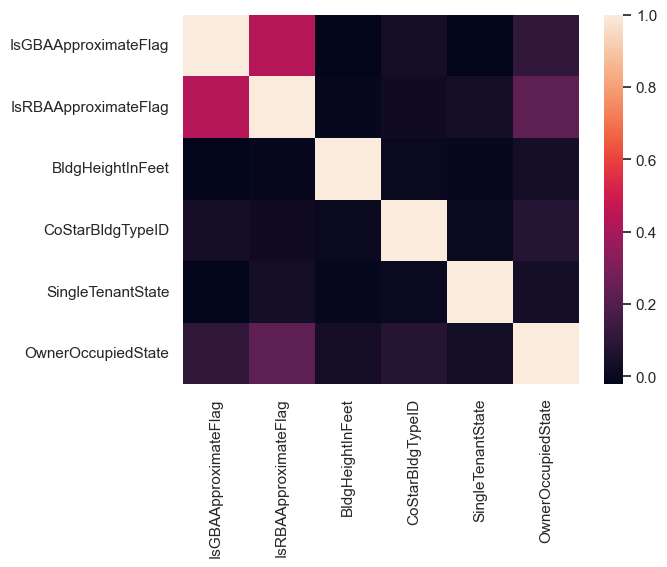

In [15]:
sns.heatmap(prop_corr)

In [16]:
df_prop_rent =pd.merge(df_rent, df_property,how ='left', on='PropertyID')
df_prop_rent

,MinRent,MonthlyDiscount,NumFreeMonths,TotalConcessionValue,IsGBAApproximateFlag,IsRBAApproximateFlag,BldgHeightInFeet,CoStarBldgTypeID,SingleTenantState,OwnerOccupiedState
PropertyID,,,,,,,,,,
7761149,699,0.0,0.00,0.0,1,0,NaN,1.0,0.0,2.0
7761149,769,0.0,0.00,0.0,1,0,NaN,1.0,0.0,2.0
7761149,899,0.0,0.00,0.0,1,0,NaN,1.0,0.0,2.0
7761149,989,0.0,0.00,0.0,1,0,NaN,1.0,0.0,2.0
7761149,1125,0.0,0.00,0.0,1,0,NaN,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
12797441,2698,0.0,0.92,0.0,0,0,NaN,1.0,0.0,0.0
12797441,3299,0.0,0.92,0.0,0,0,NaN,1.0,0.0,0.0
12797441,1299,0.0,0.92,0.0,0,0,NaN,1.0,0.0,0.0


In [17]:

df_prop_rent.describe()

,MinRent,MonthlyDiscount,NumFreeMonths,TotalConcessionValue,IsGBAApproximateFlag,IsRBAApproximateFlag,BldgHeightInFeet,CoStarBldgTypeID,SingleTenantState,OwnerOccupiedState
count,79490.000000,79490.000000,79490.000000,79490.000000,79490.000000,79490.000000,946.000000,79387.0,79387.000000,79387.000000
mean,1190.741037,0.576852,0.132326,71.121147,0.389533,0.148861,96.067653,1.0,0.000529,1.454394
std,741.309751,12.054264,0.389834,209.162242,0.487648,0.355954,65.352133,0.0,0.030527,0.890806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.0,0.000000,0.000000
25%,889.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.0,0.000000,0.000000
50%,1149.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,1.0,0.000000,2.000000
75%,1480.000000,0.000000,0.000000,0.000000,1.000000,0.000000,164.000000,1.0,0.000000,2.000000
max,107011.000000,500.000000,11.000000,5000.000000,1.000000,1.000000,164.000000,1.0,2.000000,2.000000


In [18]:
pr_corr = df_prop_rent.corr()
pr_corr

,MinRent,MonthlyDiscount,NumFreeMonths,TotalConcessionValue,IsGBAApproximateFlag,IsRBAApproximateFlag,BldgHeightInFeet,CoStarBldgTypeID,SingleTenantState,OwnerOccupiedState
MinRent,1.000000,0.007733,0.123632,0.084823,0.008677,-0.019610,-0.158476,NaN,-0.009591,-0.159379
MonthlyDiscount,0.007733,1.000000,-0.015388,0.034366,0.002961,-0.003193,NaN,NaN,-0.000830,0.001212
NumFreeMonths,0.123632,-0.015388,1.000000,-0.082898,-0.052227,-0.016182,-0.203510,NaN,0.005792,-0.277566
TotalConcessionValue,0.084823,0.034366,-0.082898,1.000000,0.030857,-0.023314,0.006520,NaN,-0.005890,0.013312
IsGBAApproximateFlag,0.008677,0.002961,-0.052227,0.030857,1.000000,0.375544,-0.896178,NaN,-0.005399,0.112316
IsRBAApproximateFlag,-0.019610,-0.003193,-0.016182,-0.023314,0.375544,1.000000,-0.474292,NaN,0.022871,0.194402
BldgHeightInFeet,-0.158476,NaN,-0.203510,0.006520,-0.896178,-0.474292,1.000000,NaN,NaN,NaN
CoStarBldgTypeID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SingleTenantState,-0.009591,-0.000830,0.005792,-0.005890,-0.005399,0.022871,NaN,NaN,1.000000,0.010615
OwnerOccupiedState,-0.159379,0.001212,-0.277566,0.013312,0.112316,0.194402,NaN,NaN,0.010615,1.000000


<Axes: >

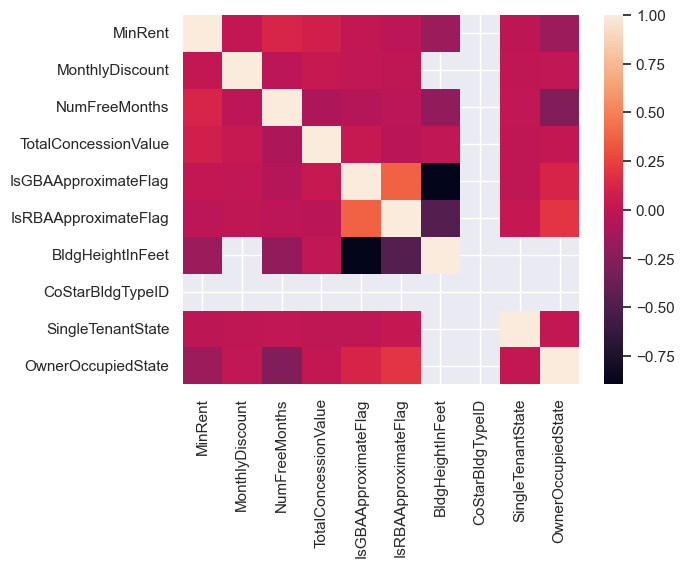

In [19]:
sns.heatmap(pr_corr)

## Apartment Data

In [21]:
df_apartment  = pd.read_excel(r'Sample Apartment and concessions Data.xlsx', \
                          index_col=0,sheet_name= 'Apartment-Specific Property Dat')



In [22]:
df_apartment = df_apartment.drop(['CondoMapped','LastResearchedUpdateEventID','ConvertingToCondosApproxDate',
                  'ApartmentOwnershipTypeID','SidingTypeID','MinLeaseTermsMonths','ApartmentRating','StudentHousingGenderTypeID',
                  'StudentHousingDegreeTypeID','HasUtilitiesCapFlag','UtilitiesCapAmount','AffiliatedCollegeID','ApartmentLifestyleSubTypeID',
                  'IsStudentRestrictiveFlag','IsFacultyIncludedFlag','MinRequiredAge','LeaseTerms','LastResearchedUpdateEventID',
                  'PropertyStabilizedDate','LastResearchedDate','ResidentialProfileID'],axis = 1)

In [23]:
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 940 entries, 908407 to 5120445
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PropertyID                     940 non-null    int64  
 1   ApartmentMeteringTypeID        756 non-null    float64
 2   UnitsPerAcre                   106 non-null    float64
 3   ParkingSpacesPerUnit           716 non-null    float64
 4   VacancyPct                     776 non-null    float64
 5   IsWalkupFlag                   817 non-null    float64
 6   NumBldgs                       939 non-null    float64
 7   BuiltToCondoSpecs              3 non-null      float64
 8   ApartmentStyleTypeID           936 non-null    float64
 9   ApartmentRoofTypeID            377 non-null    float64
 10  ApartmentRentTypeID            940 non-null    int64  
 11  AffordableRentSubtypeID        78 non-null     float64
 12  ApartmentLifestyleTypeID       939 non-null   

In [24]:
df_apartment.corr()


,PropertyID,ApartmentMeteringTypeID,UnitsPerAcre,ParkingSpacesPerUnit,VacancyPct,IsWalkupFlag,NumBldgs,BuiltToCondoSpecs,ApartmentStyleTypeID,ApartmentRoofTypeID,...,IsDailyPricingFlag,IsPropertyUnitMixConfirmed,MaxLeaseTermsMonths,IsShortTermLeaseAvailableFlag,IsScrapeFlag,IsFeedFlag,ApartmentBuildingRatingID,NoUtilitiesIncludedFlag,HasOnSiteLeasingFlag,ModelsLockedFlag
PropertyID,1.000000,0.074933,-0.824867,-0.091993,-0.045953,-0.250735,-0.034182,NaN,0.230168,-0.016965,...,-0.636686,-0.283988,0.987345,0.052774,-0.112427,-8.389590e-02,0.169046,-0.196834,-0.028457,2.544857e-02
ApartmentMeteringTypeID,0.074933,1.000000,-0.356971,0.051040,-0.095975,0.042025,0.054945,NaN,-0.146067,0.103169,...,0.154311,0.044662,NaN,-0.023019,-0.004320,1.499328e-01,0.181772,0.091822,0.081360,-1.208695e-02
UnitsPerAcre,-0.824867,-0.356971,1.000000,-0.229744,0.008751,-0.205403,-0.322092,NaN,0.207531,0.027343,...,-0.228207,-0.081857,NaN,-0.231864,0.059605,-4.078005e-01,-0.343486,-0.302884,-0.268716,-1.223839e-01
ParkingSpacesPerUnit,-0.091993,0.051040,-0.229744,1.000000,0.028414,0.070659,0.003716,NaN,-0.095685,0.054452,...,0.237962,-0.122669,NaN,0.124815,0.007224,-1.339496e-02,-0.091768,0.020816,0.042143,-1.453630e-01
VacancyPct,-0.045953,-0.095975,0.008751,0.028414,1.000000,-0.051913,0.077216,NaN,-0.011304,-0.070273,...,0.033268,0.095030,NaN,0.006933,0.028319,4.086750e-02,-0.006036,0.013923,0.063293,-1.695174e-01
IsWalkupFlag,-0.250735,0.042025,-0.205403,0.070659,-0.051913,1.000000,0.157131,NaN,-0.262021,0.020452,...,0.299532,0.328772,-1.000000,-0.032231,0.113990,1.513283e-01,-0.046410,0.213203,0.160758,-5.052485e-02
NumBldgs,-0.034182,0.054945,-0.322092,0.003716,0.077216,0.157131,1.000000,NaN,0.065212,0.042216,...,0.110103,-0.017212,-0.942809,-0.037247,0.020932,2.278235e-02,0.031756,0.018623,0.085238,1.706231e-02
BuiltToCondoSpecs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApartmentStyleTypeID,0.230168,-0.146067,0.207531,-0.095685,-0.011304,-0.262021,0.065212,NaN,1.000000,-0.003528,...,-0.314767,-0.214749,1.000000,-0.002313,-0.082541,-1.416492e-01,-0.028299,-0.081875,-0.247836,-1.673862e-02
ApartmentRoofTypeID,-0.016965,0.103169,0.027343,0.054452,-0.070273,0.020452,0.042216,NaN,-0.003528,1.000000,...,0.020671,NaN,NaN,-0.013347,-0.044233,8.360198e-02,0.193679,-0.108500,0.105489,5.849388e-02


In [25]:
apt_corr = df_apartment.corr()
apt_corr

,PropertyID,ApartmentMeteringTypeID,UnitsPerAcre,ParkingSpacesPerUnit,VacancyPct,IsWalkupFlag,NumBldgs,BuiltToCondoSpecs,ApartmentStyleTypeID,ApartmentRoofTypeID,...,IsDailyPricingFlag,IsPropertyUnitMixConfirmed,MaxLeaseTermsMonths,IsShortTermLeaseAvailableFlag,IsScrapeFlag,IsFeedFlag,ApartmentBuildingRatingID,NoUtilitiesIncludedFlag,HasOnSiteLeasingFlag,ModelsLockedFlag
PropertyID,1.000000,0.074933,-0.824867,-0.091993,-0.045953,-0.250735,-0.034182,NaN,0.230168,-0.016965,...,-0.636686,-0.283988,0.987345,0.052774,-0.112427,-8.389590e-02,0.169046,-0.196834,-0.028457,2.544857e-02
ApartmentMeteringTypeID,0.074933,1.000000,-0.356971,0.051040,-0.095975,0.042025,0.054945,NaN,-0.146067,0.103169,...,0.154311,0.044662,NaN,-0.023019,-0.004320,1.499328e-01,0.181772,0.091822,0.081360,-1.208695e-02
UnitsPerAcre,-0.824867,-0.356971,1.000000,-0.229744,0.008751,-0.205403,-0.322092,NaN,0.207531,0.027343,...,-0.228207,-0.081857,NaN,-0.231864,0.059605,-4.078005e-01,-0.343486,-0.302884,-0.268716,-1.223839e-01
ParkingSpacesPerUnit,-0.091993,0.051040,-0.229744,1.000000,0.028414,0.070659,0.003716,NaN,-0.095685,0.054452,...,0.237962,-0.122669,NaN,0.124815,0.007224,-1.339496e-02,-0.091768,0.020816,0.042143,-1.453630e-01
VacancyPct,-0.045953,-0.095975,0.008751,0.028414,1.000000,-0.051913,0.077216,NaN,-0.011304,-0.070273,...,0.033268,0.095030,NaN,0.006933,0.028319,4.086750e-02,-0.006036,0.013923,0.063293,-1.695174e-01
IsWalkupFlag,-0.250735,0.042025,-0.205403,0.070659,-0.051913,1.000000,0.157131,NaN,-0.262021,0.020452,...,0.299532,0.328772,-1.000000,-0.032231,0.113990,1.513283e-01,-0.046410,0.213203,0.160758,-5.052485e-02
NumBldgs,-0.034182,0.054945,-0.322092,0.003716,0.077216,0.157131,1.000000,NaN,0.065212,0.042216,...,0.110103,-0.017212,-0.942809,-0.037247,0.020932,2.278235e-02,0.031756,0.018623,0.085238,1.706231e-02
BuiltToCondoSpecs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApartmentStyleTypeID,0.230168,-0.146067,0.207531,-0.095685,-0.011304,-0.262021,0.065212,NaN,1.000000,-0.003528,...,-0.314767,-0.214749,1.000000,-0.002313,-0.082541,-1.416492e-01,-0.028299,-0.081875,-0.247836,-1.673862e-02
ApartmentRoofTypeID,-0.016965,0.103169,0.027343,0.054452,-0.070273,0.020452,0.042216,NaN,-0.003528,1.000000,...,0.020671,NaN,NaN,-0.013347,-0.044233,8.360198e-02,0.193679,-0.108500,0.105489,5.849388e-02


<Axes: >

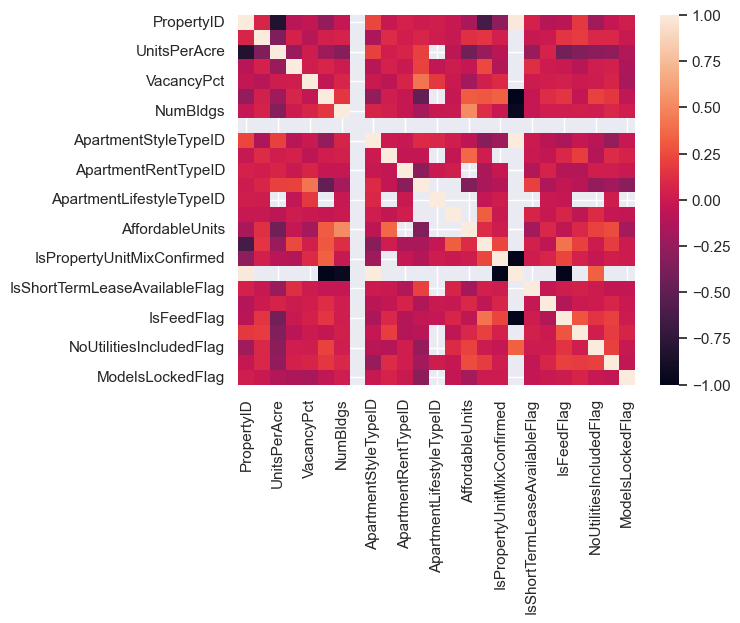

In [26]:
sns.heatmap(apt_corr)

In [27]:
df_apt_prop_rent =pd.merge(df_prop_rent, df_apartment,how='left', on='PropertyID') 
df_apt_prop_rent

,PropertyID,MinRent,MonthlyDiscount,NumFreeMonths,TotalConcessionValue,IsGBAApproximateFlag,IsRBAApproximateFlag,BldgHeightInFeet,CoStarBldgTypeID,SingleTenantState,...,IsDailyPricingFlag,IsPropertyUnitMixConfirmed,MaxLeaseTermsMonths,IsShortTermLeaseAvailableFlag,IsScrapeFlag,IsFeedFlag,ApartmentBuildingRatingID,NoUtilitiesIncludedFlag,HasOnSiteLeasingFlag,ModelsLockedFlag
0,7761149,699,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,NaN,1.0,NaN,NaN,0,1,4.0,1.0,1,0.0
1,7761149,769,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,NaN,1.0,NaN,NaN,0,1,4.0,1.0,1,0.0
2,7761149,899,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,NaN,1.0,NaN,NaN,0,1,4.0,1.0,1,0.0
3,7761149,989,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,NaN,1.0,NaN,NaN,0,1,4.0,1.0,1,0.0
4,7761149,1125,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,NaN,1.0,NaN,NaN,0,1,4.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79485,12797441,2698,0.0,0.92,0.0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,0,0,4.0,0.0,0,1.0
79486,12797441,3299,0.0,0.92,0.0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,0,0,4.0,0.0,0,1.0
79487,12797441,1299,0.0,0.92,0.0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,0,0,4.0,0.0,0,1.0
79488,12797441,1729,0.0,0.92,0.0,0,0,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,0,0,4.0,0.0,0,1.0


In [28]:
df_apt_prop_rent.corr()

,PropertyID,MinRent,MonthlyDiscount,NumFreeMonths,TotalConcessionValue,IsGBAApproximateFlag,IsRBAApproximateFlag,BldgHeightInFeet,CoStarBldgTypeID,SingleTenantState,...,IsDailyPricingFlag,IsPropertyUnitMixConfirmed,MaxLeaseTermsMonths,IsShortTermLeaseAvailableFlag,IsScrapeFlag,IsFeedFlag,ApartmentBuildingRatingID,NoUtilitiesIncludedFlag,HasOnSiteLeasingFlag,ModelsLockedFlag
PropertyID,1.000000,0.155962,0.005295,0.147888,0.007529,0.041710,-0.068594,0.216788,NaN,-0.021669,...,-0.665163,-0.257492,0.982639,0.079957,-0.185879,-0.040255,0.135573,-0.127384,-0.043858,-0.022448
MinRent,0.155962,1.000000,0.007733,0.123632,0.084823,0.008677,-0.019610,-0.158476,NaN,-0.009591,...,-0.175502,-0.083696,0.686316,-0.012379,-0.057511,-0.020072,0.190521,-0.031849,0.001746,0.003744
MonthlyDiscount,0.005295,0.007733,1.000000,-0.015388,0.034366,0.002961,-0.003193,NaN,NaN,-0.000830,...,0.014875,-0.015959,0.223361,-0.011503,0.024415,-0.008864,0.015047,0.009269,0.006209,-0.010379
NumFreeMonths,0.147888,0.123632,-0.015388,1.000000,-0.082898,-0.052227,-0.016182,-0.203510,NaN,0.005792,...,-0.210612,-0.135210,0.345780,-0.059220,-0.058560,-0.134324,0.053404,-0.072440,-0.041693,-0.058758
TotalConcessionValue,0.007529,0.084823,0.034366,-0.082898,1.000000,0.030857,-0.023314,0.006520,NaN,-0.005890,...,-0.015416,0.027695,0.004496,-0.023189,0.017614,0.054151,0.040500,0.030984,0.008136,-0.021863
IsGBAApproximateFlag,0.041710,0.008677,0.002961,-0.052227,0.030857,1.000000,0.375544,-0.896178,NaN,-0.005399,...,-0.158491,-0.006907,1.000000,-0.017340,0.050828,0.029214,-0.025573,-0.014212,0.059445,0.015599
IsRBAApproximateFlag,-0.068594,-0.019610,-0.003193,-0.016182,-0.023314,0.375544,1.000000,-0.474292,NaN,0.022871,...,-0.014446,0.050639,NaN,0.053653,-0.039655,0.041799,-0.062358,0.032719,-0.018906,-0.012080
BldgHeightInFeet,0.216788,-0.158476,NaN,-0.203510,0.006520,-0.896178,-0.474292,1.000000,NaN,NaN,...,NaN,NaN,NaN,0.623464,NaN,-0.094576,-0.530443,NaN,NaN,0.140294
CoStarBldgTypeID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SingleTenantState,-0.021669,-0.009591,-0.000830,0.005792,-0.005890,-0.005399,0.022871,NaN,NaN,1.000000,...,-0.016781,-0.052770,NaN,0.015400,0.012277,-0.016193,-0.024246,0.003309,0.002516,0.006097


<Axes: >

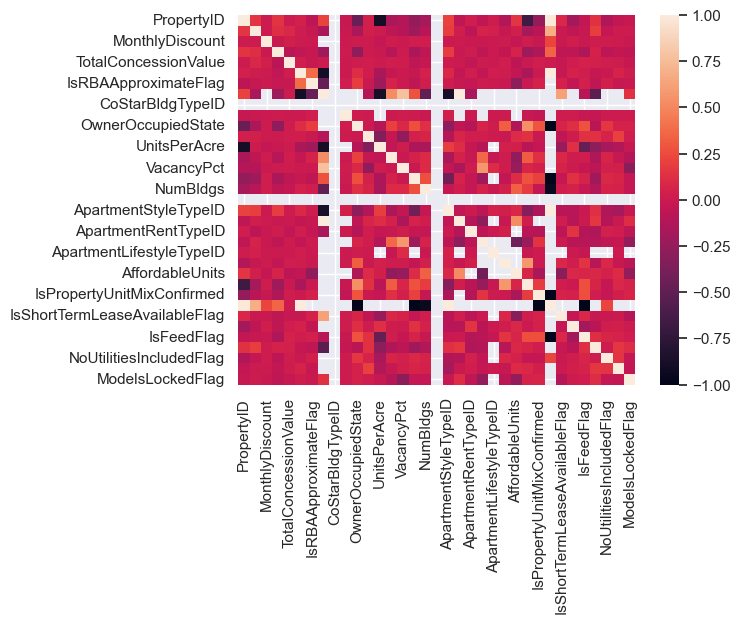

In [29]:
sns.heatmap(df_apt_prop_rent.corr())

## Geography

In [30]:
df_geography  = pd.read_excel(r'Sample Apartment and concessions Data.xlsx', \
                           index_col=0,sheet_name= 'Geography')
df_geography

,PropertyTypeID,RentableSqFtTotal,ConstructionStatusID,BuildingRatingID,ResearchMarketID,CBSAID,PrimarySubmarketID,CountyID,CountryCode,TwoCharCountryCode,SubmarketClusterID,PropertySubTypeID,PropertyGroupTypeID,PropertyGroupSubTypeID,LastUpdatedDate,CityID,CoStarProductMarketID,BuildingClassID
PropertyID,,,,,,,,,,,,,,,,,,
9648302,11,50000,1,4,50,41700,17078,2532,USA,US,7579,58,NaN,NaN,2021-06-23 19:16:12.343,45938,860.0,1
7761434,11,110520,1,3,50,41700,29896,2540,USA,US,7591,58,NaN,NaN,2021-06-23 19:16:12.343,40324,860.0,3
792370,11,178011,1,2,50,41700,17168,2540,USA,US,7591,58,NaN,NaN,2021-06-23 19:16:12.343,40324,860.0,3
11118260,11,337134,1,5,50,41700,29877,2540,USA,US,7584,58,NaN,NaN,2021-06-23 19:16:12.343,40324,860.0,1
7769377,11,235828,1,3,50,41700,17225,2540,USA,US,7589,58,NaN,NaN,2021-06-23 19:16:12.343,40324,860.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9293901,11,377096,1,4,50,41700,17084,2540,USA,US,10136,58,NaN,NaN,2021-06-23 19:16:12.343,40324,860.0,1
7509154,11,246520,1,3,50,41700,17312,2540,USA,US,7590,58,NaN,NaN,2021-06-23 19:16:12.343,40324,860.0,2
6764893,11,243249,1,3,50,41700,29874,2540,USA,US,7584,58,NaN,NaN,2022-04-05 13:40:09.000,40324,860.0,2


In [32]:
df_geography = df_geography.drop(['LastUpdatedDate','CountryCode','TwoCharCountryCode'],axis = 1)

KeyError: "['LastUpdatedDate', 'CountryCode', 'TwoCharCountryCode'] not found in axis"

<Axes: >

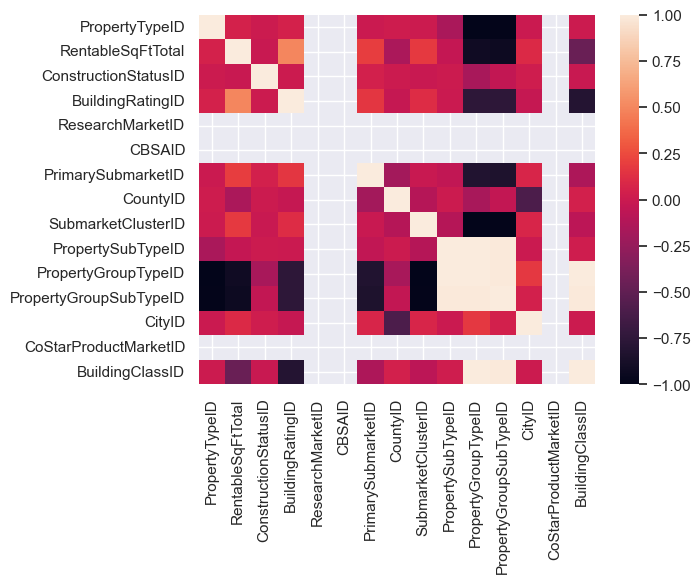

In [33]:
sns.heatmap(df_geography.corr())


In [34]:
df_geography.corr()

,PropertyTypeID,RentableSqFtTotal,ConstructionStatusID,BuildingRatingID,ResearchMarketID,CBSAID,PrimarySubmarketID,CountyID,SubmarketClusterID,PropertySubTypeID,PropertyGroupTypeID,PropertyGroupSubTypeID,CityID,CoStarProductMarketID,BuildingClassID
PropertyTypeID,1.000000,0.049647,0.004135,0.050938,NaN,NaN,-0.004505,0.009827,0.003810,-0.159419,-1.000000,-0.990196,-0.006880,NaN,0.000507
RentableSqFtTotal,0.049647,1.000000,-0.011186,0.499032,NaN,NaN,0.192639,-0.149536,0.174212,-0.036090,-0.914579,-0.931803,0.097918,NaN,-0.454648
ConstructionStatusID,0.004135,-0.011186,1.000000,0.005155,NaN,NaN,0.044216,0.001000,-0.010940,0.000206,-0.166667,-0.039216,0.018002,NaN,-0.009181
BuildingRatingID,0.050938,0.499032,0.005155,1.000000,NaN,NaN,0.158842,-0.027531,0.109487,-0.003321,-0.763763,-0.763763,-0.029562,NaN,-0.806805
ResearchMarketID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBSAID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrimarySubmarketID,-0.004505,0.192639,0.044216,0.158842,NaN,NaN,1.000000,-0.194434,-0.014444,-0.052480,-0.827152,-0.840075,0.077647,NaN,-0.145863
CountyID,0.009827,-0.149536,0.001000,-0.027531,NaN,NaN,-0.194434,1.000000,-0.101716,0.000489,-0.166667,-0.039216,-0.595423,NaN,0.046088
SubmarketClusterID,0.003810,0.174212,-0.010940,0.109487,NaN,NaN,-0.014444,-0.101716,1.000000,-0.104998,-1.000000,-0.990295,0.071271,NaN,-0.071598
PropertySubTypeID,-0.159419,-0.036090,0.000206,-0.003321,NaN,NaN,-0.052480,0.000489,-0.104998,1.000000,1.000000,0.990196,-0.000342,NaN,0.019898


In [35]:
df_apt_prop_rent_geo =pd.merge(df_apt_prop_rent, df_geography,how ='left', on='PropertyID') 
df_apt_prop_rent_geo

,PropertyID,MinRent,MonthlyDiscount,NumFreeMonths,TotalConcessionValue,IsGBAApproximateFlag,IsRBAApproximateFlag,BldgHeightInFeet,CoStarBldgTypeID,SingleTenantState,...,CBSAID,PrimarySubmarketID,CountyID,SubmarketClusterID,PropertySubTypeID,PropertyGroupTypeID,PropertyGroupSubTypeID,CityID,CoStarProductMarketID,BuildingClassID
0,7761149,699,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,41700,29876,2540,7584,58,NaN,NaN,40324,860.0,3
1,7761149,769,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,41700,29876,2540,7584,58,NaN,NaN,40324,860.0,3
2,7761149,899,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,41700,29876,2540,7584,58,NaN,NaN,40324,860.0,3
3,7761149,989,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,41700,29876,2540,7584,58,NaN,NaN,40324,860.0,3
4,7761149,1125,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,41700,29876,2540,7584,58,NaN,NaN,40324,860.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79485,12797441,2698,0.0,0.92,0.0,0,0,NaN,1.0,0.0,...,41700,29841,2540,7581,58,NaN,NaN,40324,860.0,2
79486,12797441,3299,0.0,0.92,0.0,0,0,NaN,1.0,0.0,...,41700,29841,2540,7581,58,NaN,NaN,40324,860.0,2
79487,12797441,1299,0.0,0.92,0.0,0,0,NaN,1.0,0.0,...,41700,29841,2540,7581,58,NaN,NaN,40324,860.0,2
79488,12797441,1729,0.0,0.92,0.0,0,0,NaN,1.0,0.0,...,41700,29841,2540,7581,58,NaN,NaN,40324,860.0,2


In [36]:
df_apt_prop_rent_corr = df_apt_prop_rent_geo.corr()

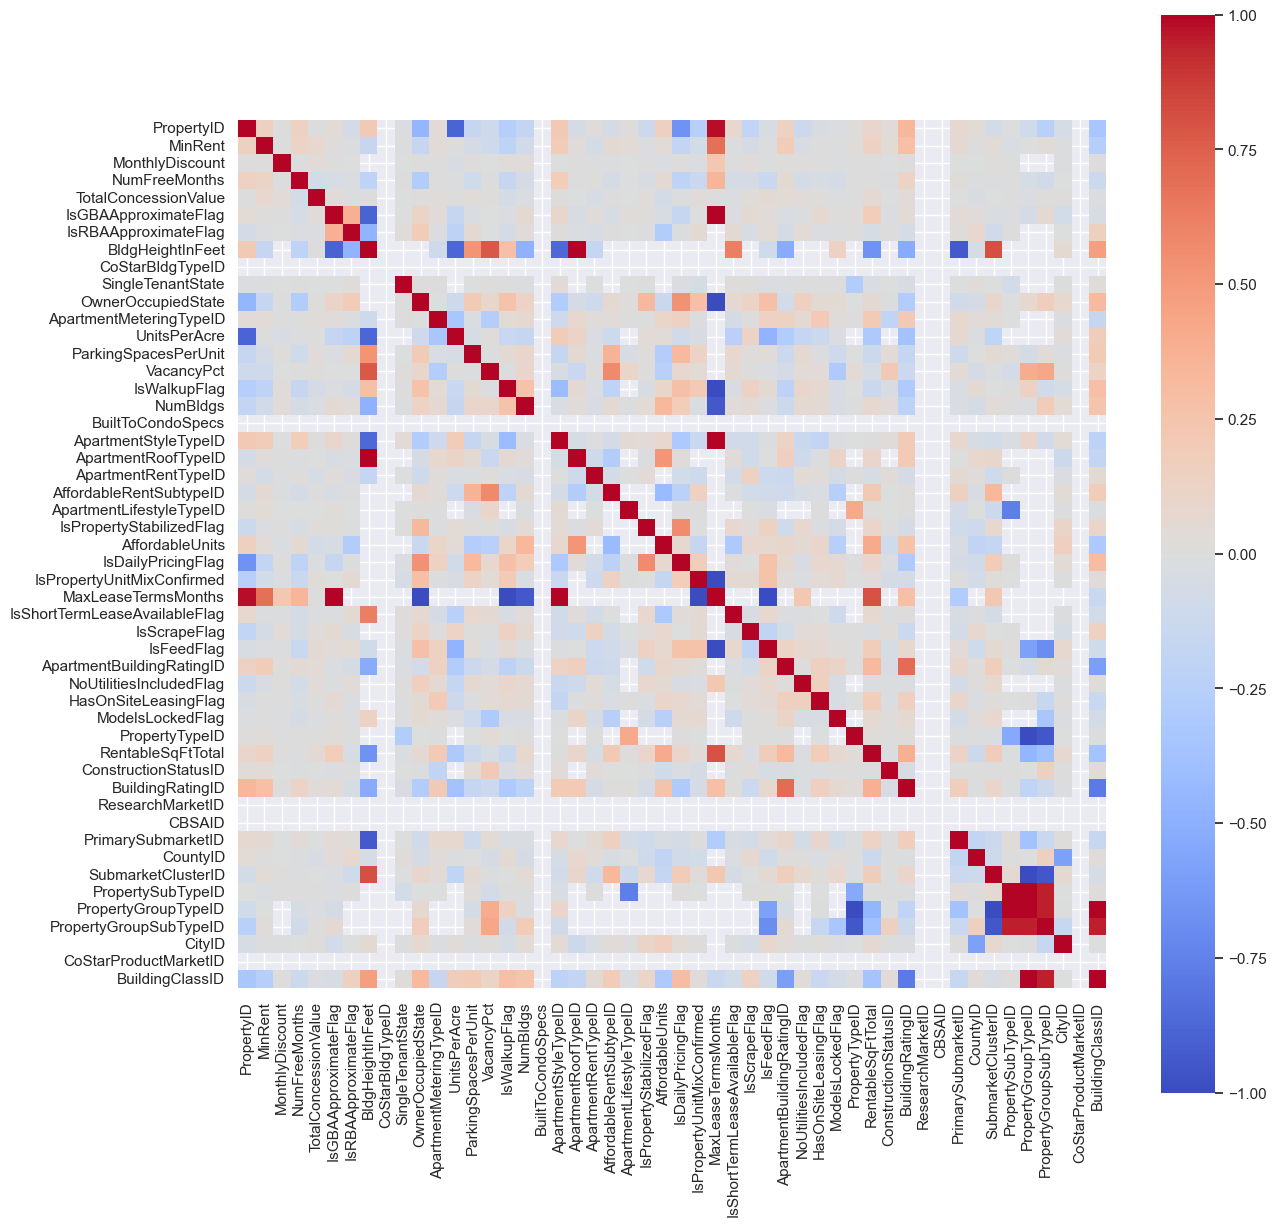

In [37]:
fig, ax = plt.subplots(figsize=(14, 14))

sns.heatmap(df_apt_prop_rent_corr, cmap='coolwarm', square=True)
plt.show()

In [38]:
df_apt_prop_rent_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79490 entries, 0 to 79489
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PropertyID                     79490 non-null  int64  
 1   MinRent                        79490 non-null  int64  
 2   MonthlyDiscount                79490 non-null  float64
 3   NumFreeMonths                  79490 non-null  float64
 4   TotalConcessionValue           79490 non-null  float64
 5   IsGBAApproximateFlag           79490 non-null  int64  
 6   IsRBAApproximateFlag           79490 non-null  int64  
 7   BldgHeightInFeet               946 non-null    float64
 8   CoStarBldgTypeID               79387 non-null  float64
 9   SingleTenantState              79387 non-null  float64
 10  OwnerOccupiedState             79387 non-null  float64
 11  ApartmentMeteringTypeID        63999 non-null  float64
 12  UnitsPerAcre                   7897 non-null  

In [39]:
df_apt_prop_rent_geo.describe().T

,count,mean,std,min,25%,50%,75%,max
PropertyID,79490.0,7.896640e+06,2.653815e+06,43198.0,7057581.000,8107143.000,9641988.000,1.391344e+07
MinRent,79490.0,1.190741e+03,7.413098e+02,0.0,889.000,1149.000,1480.000,1.070110e+05
MonthlyDiscount,79490.0,5.768524e-01,1.205426e+01,0.0,0.000,0.000,0.000,5.000000e+02
NumFreeMonths,79490.0,1.323262e-01,3.898338e-01,0.0,0.000,0.000,0.000,1.100000e+01
TotalConcessionValue,79490.0,7.112115e+01,2.091622e+02,0.0,0.000,0.000,0.000,5.000000e+03
IsGBAApproximateFlag,79490.0,3.895333e-01,4.876475e-01,0.0,0.000,0.000,1.000,1.000000e+00
IsRBAApproximateFlag,79490.0,1.488615e-01,3.559541e-01,0.0,0.000,0.000,0.000,1.000000e+00
BldgHeightInFeet,946.0,9.606765e+01,6.535213e+01,10.0,20.000,125.000,164.000,1.640000e+02
CoStarBldgTypeID,79387.0,1.000000e+00,0.000000e+00,1.0,1.000,1.000,1.000,1.000000e+00
SingleTenantState,79387.0,5.290539e-04,3.052662e-02,0.0,0.000,0.000,0.000,2.000000e+00


   #     Submarket 
    

In [95]:
df_submarket  = pd.read_excel(r'Sample Apartment and concessions Data.xlsx', \
                          index_col=0,sheet_name= 'Submarket Aggregates')
df_submarket

,PrimarySubmarketID,TimeDimDate,NumUnits,NumUnitsVacant,NumUnitsAvailable
SubmarketClusterID,,,,,
7589,17293,2019-03-31,341,203.1054,12
7580,17082,2020-12-31,34,0.9037,0
7593,17079,2020-12-31,57,10.4166,0
7592,17302,2022-09-30,298,5.8438,5
7590,17145,2019-03-31,308,223.7763,32
...,...,...,...,...,...
7579,17078,2021-12-31,379,33.3523,3
7588,17148,2021-12-31,291,8.6377,3
7591,17212,2018-09-30,43,2.1604,0


In [96]:
df_submarket = pd.get_dummies(df_submarket )
df_submarket

,PrimarySubmarketID,TimeDimDate,NumUnits,NumUnitsVacant,NumUnitsAvailable
SubmarketClusterID,,,,,
7589,17293,2019-03-31,341,203.1054,12
7580,17082,2020-12-31,34,0.9037,0
7593,17079,2020-12-31,57,10.4166,0
7592,17302,2022-09-30,298,5.8438,5
7590,17145,2019-03-31,308,223.7763,32
...,...,...,...,...,...
7579,17078,2021-12-31,379,33.3523,3
7588,17148,2021-12-31,291,8.6377,3
7591,17212,2018-09-30,43,2.1604,0


In [62]:
df_submarket = df_submarket.drop(['TimeDimDate'],axis = 1)

In [88]:
df_costar_final =pd.merge(df_apt_prop_rent_geo, df_submarket,how = 'left', on='PrimarySubmarketID') 


df_costar_final

,PropertyID,MinRent,MonthlyDiscount,NumFreeMonths,TotalConcessionValue,IsGBAApproximateFlag,IsRBAApproximateFlag,BldgHeightInFeet,CoStarBldgTypeID,SingleTenantState,...,SubmarketClusterID,PropertySubTypeID,PropertyGroupTypeID,PropertyGroupSubTypeID,CityID,CoStarProductMarketID,BuildingClassID,NumUnits,NumUnitsVacant,NumUnitsAvailable
0,7761149,699,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,7584,58,NaN,NaN,40324,860.0,3,8927.0,543.2799,784.0
1,7761149,699,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,7584,58,NaN,NaN,40324,860.0,3,9215.0,813.9008,793.0
2,7761149,699,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,7584,58,NaN,NaN,40324,860.0,3,8927.0,644.8366,784.0
3,7761149,699,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,7584,58,NaN,NaN,40324,860.0,3,8927.0,751.9651,784.0
4,7761149,699,0.0,0.00,0.0,1,0,NaN,1.0,0.0,...,7584,58,NaN,NaN,40324,860.0,3,8645.0,809.1953,757.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664229,12797441,2399,0.0,0.92,0.0,0,0,NaN,1.0,0.0,...,7581,58,NaN,NaN,40324,860.0,2,491.0,51.9952,5.0
1664230,12797441,2399,0.0,0.92,0.0,0,0,NaN,1.0,0.0,...,7581,58,NaN,NaN,40324,860.0,2,572.0,58.2303,11.0
1664231,12797441,2399,0.0,0.92,0.0,0,0,NaN,1.0,0.0,...,7581,58,NaN,NaN,40324,860.0,2,1187.0,351.3917,206.0
1664232,12797441,2399,0.0,0.92,0.0,0,0,NaN,1.0,0.0,...,7581,58,NaN,NaN,40324,860.0,2,1187.0,361.1984,206.0


In [64]:
df_costar_final_corr = df_costar_final.corr()

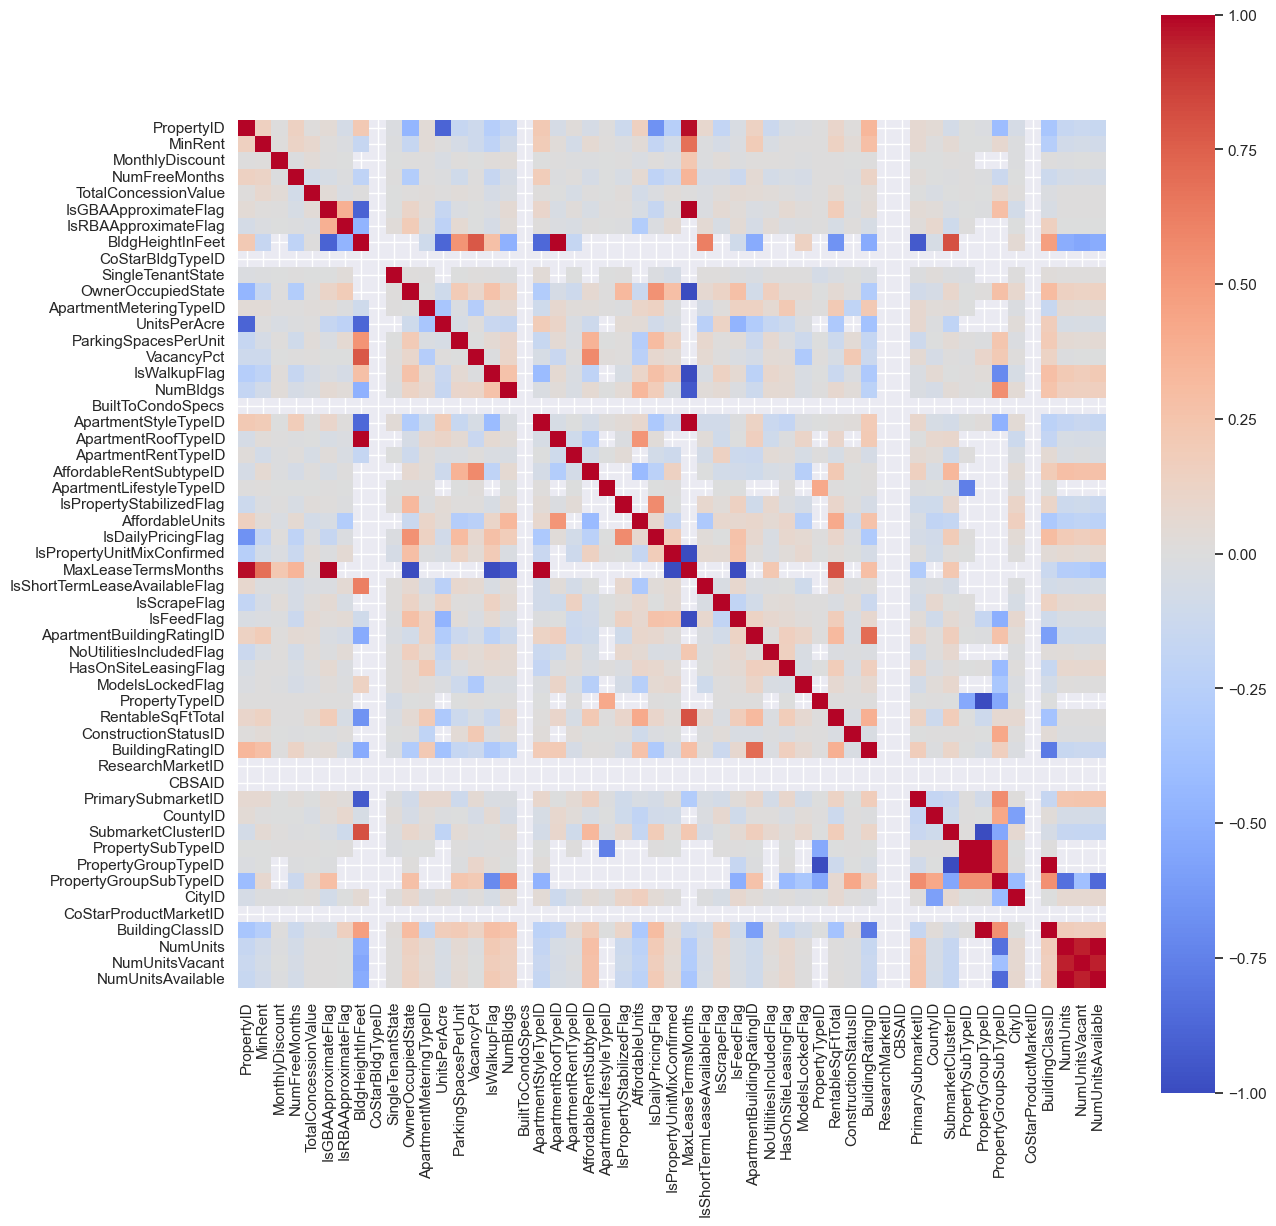

In [65]:
fig, ax = plt.subplots(figsize=(14, 14))

sns.heatmap(df_costar_final_corr, cmap='coolwarm', square=True)
plt.show()

In [72]:
df_costar_final=df_costar_final.fillna(0)

In [73]:
df_costar_final.describe().T

,count,mean,std,min,25%,50%,75%,max
PropertyID,1664234.0,7.889001e+06,2.653032e+06,43198.0,7.043751e+06,8.098764e+06,9641988.000,1.391344e+07
MinRent,1664234.0,1.189558e+03,7.408563e+02,0.0,8.890000e+02,1.149000e+03,1480.000,1.070110e+05
MonthlyDiscount,1664234.0,5.786049e-01,1.207245e+01,0.0,0.000000e+00,0.000000e+00,0.000,5.000000e+02
NumFreeMonths,1664234.0,1.313856e-01,3.878476e-01,0.0,0.000000e+00,0.000000e+00,0.000,1.100000e+01
TotalConcessionValue,1664234.0,7.119028e+01,2.091923e+02,0.0,0.000000e+00,0.000000e+00,0.000,5.000000e+03
IsGBAApproximateFlag,1664234.0,3.896982e-01,4.876819e-01,0.0,0.000000e+00,0.000000e+00,1.000,1.000000e+00
IsRBAApproximateFlag,1664234.0,1.493137e-01,3.563976e-01,0.0,0.000000e+00,0.000000e+00,0.000,1.000000e+00
BldgHeightInFeet,1664234.0,1.146762e+00,1.264040e+01,0.0,0.000000e+00,0.000000e+00,0.000,1.640000e+02
CoStarBldgTypeID,1664234.0,9.987003e-01,3.602789e-02,0.0,1.000000e+00,1.000000e+00,1.000,1.000000e+00
SingleTenantState,1664234.0,4.578683e-04,2.809525e-02,0.0,0.000000e+00,0.000000e+00,0.000,2.000000e+00


In [74]:
X = df_costar_final[df_costar_final.columns.drop(list(df_costar_final.filter(regex='ID')))]
X
#df_costar_final.columns.str.contains('ID', case=False)


,MinRent,MonthlyDiscount,NumFreeMonths,TotalConcessionValue,IsGBAApproximateFlag,IsRBAApproximateFlag,BldgHeightInFeet,SingleTenantState,OwnerOccupiedState,UnitsPerAcre,...,IsShortTermLeaseAvailableFlag,IsScrapeFlag,IsFeedFlag,NoUtilitiesIncludedFlag,HasOnSiteLeasingFlag,ModelsLockedFlag,RentableSqFtTotal,NumUnits,NumUnitsVacant,NumUnitsAvailable
0,699,0.0,0.00,0.0,1,0,0.0,0.0,2.0,0.0,...,0.0,0,1,1.0,1,0.0,148919,8927.0,543.2799,784.0
1,699,0.0,0.00,0.0,1,0,0.0,0.0,2.0,0.0,...,0.0,0,1,1.0,1,0.0,148919,9215.0,813.9008,793.0
2,699,0.0,0.00,0.0,1,0,0.0,0.0,2.0,0.0,...,0.0,0,1,1.0,1,0.0,148919,8927.0,644.8366,784.0
3,699,0.0,0.00,0.0,1,0,0.0,0.0,2.0,0.0,...,0.0,0,1,1.0,1,0.0,148919,8927.0,751.9651,784.0
4,699,0.0,0.00,0.0,1,0,0.0,0.0,2.0,0.0,...,0.0,0,1,1.0,1,0.0,148919,8645.0,809.1953,757.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664229,2399,0.0,0.92,0.0,0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,1.0,100000,491.0,51.9952,5.0
1664230,2399,0.0,0.92,0.0,0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,1.0,100000,572.0,58.2303,11.0
1664231,2399,0.0,0.92,0.0,0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,1.0,100000,1187.0,351.3917,206.0
1664232,2399,0.0,0.92,0.0,0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,1.0,100000,1187.0,361.1984,206.0


In [82]:
X= X.drop(['VacancyPct'],axis = 1)
y=df_costar_final.VacancyPct

KeyError: "['VacancyPct'] not found in axis"

In [76]:
costarlinreg = LinearRegression()

costarlinreg.fit(X,y)

LinearRegression()

In [87]:
preds= costarlinreg.predict(X)
preds

KeyboardInterrupt: 

ValueError: x and y must be the same size

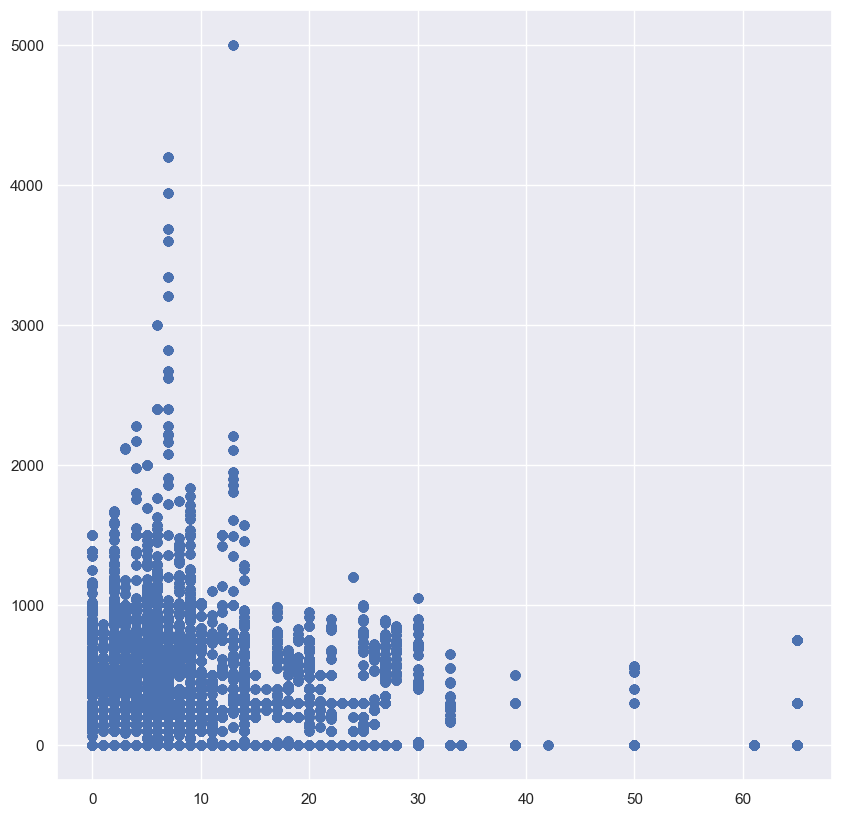

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(y, X.TotalConcessionValue)
plt.scatter(X,, c='Red')
plt.title('CoStar Data (Vacancy) ')
plt.xlabel('Costar Data')
plt.ylabel('Vacancy')
plt.show()

In [85]:
df_costar_final.to_csv('CoStar_Combined.csv')